In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries Loaded Successfully")

Libraries Loaded Successfully


In [23]:
import pandas as pd

# Load data
df = pd.read_csv('combined_data_clean.csv')

# Drop betting-related columns
betting_keywords = ['B365', 'BW', 'PS', 'WH', 'Max', 'Avg', 'VC', 'IW', 'AH']
df = df.drop(columns=[c for c in df.columns if any(k in c for k in betting_keywords)])

# Rename columns
rename_map = {
    'FTHG': 'Full Time Home Goals',
    'FTAG': 'Full Time Away Goals',
    'FTR' : 'Full Time Result',
    'HTHG': 'Half Time Home Goals',
    'HTAG': 'Half Time Away Goals',
    'HST' : 'Home Shots on Target',
    'AST' : 'Away Shots on Target'
}
df = df.rename(columns=rename_map)

# Features and target selection
feature_cols = [
    'Half Time Home Goals',
    'Half Time Away Goals',
    'Home Shots on Target',
    'Away Shots on Target'
]
target_col = 'Full Time Result'

# Drop missing values only in features + target
df_clean = df[feature_cols + [target_col]].dropna()

print(f"Data Loaded. Total Matches: {len(df_clean)}")
df_clean.head()


Data Loaded. Total Matches: 3863


,Half Time Home Goals,Half Time Away Goals,Home Shots on Target,Away Shots on Target,Full Time Result
0,0.410169,-0.691476,-0.260731,-0.764263,D
1,0.410169,-0.691476,-0.260731,-0.764263,D
2,-0.787181,0.715283,-0.260731,-0.764263,H
3,0.410169,0.715283,0.139446,0.629421,D
4,-0.787181,0.715283,0.139446,0.164860,D


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = df[
    [
        'Half Time Home Goals',
        'Half Time Away Goals',
        'Home Shots on Target',
        'Away Shots on Target'
    ]
]
y = df['Full Time Result'].astype(str).str.strip().str.upper()
y = y.map({'H':0, 'D':1, 'A':2})
print(y.value_counts(dropna=False))
print("NaNs after mapping:", y.isna().sum())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

print("Preprocessing Done: Data Split & Scaled")


Full Time Result
0    1736
2    1105
1    1022
Name: count, dtype: int64
NaNs after mapping: 0
Preprocessing Done: Data Split & Scaled


In [25]:
# multi_class='multinomial' 3ashan 3andena 3 labels
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)

print("Model Training Completed")

Model Training Completed


c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 63.65%

Classification Report:
              precision    recall  f1-score   support

           A       0.69      0.81      0.75       337
           D       0.41      0.26      0.32       200
           H       0.67      0.70      0.69       236

    accuracy                           0.64       773
   macro avg       0.59      0.59      0.58       773
weighted avg       0.61      0.64      0.62       773



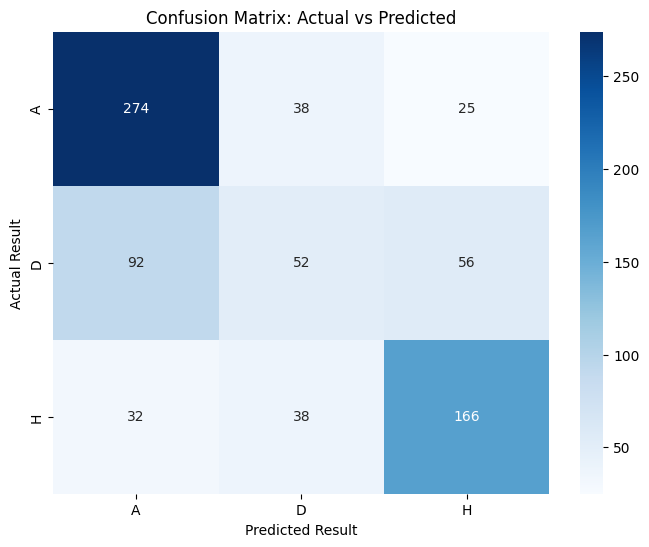

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your encoder variable is called 'encoder'
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix: Actual vs Predicted')
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')
plt.show()


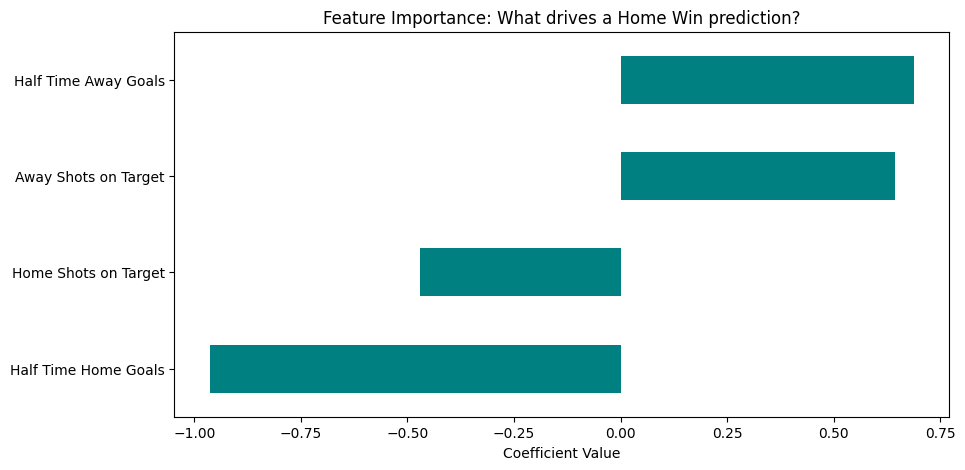

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Features list
feature_cols = [
    'Half Time Home Goals',
    'Half Time Away Goals',
    'Home Shots on Target',
    'Away Shots on Target'
]

# Extract Coefficients for 'Home Win' (Class 2)
importance = lr_model.coef_[2]  # assuming LogisticRegression with multi_class='multinomial'
feat_importance = pd.Series(importance, index=feature_cols)

# Plotting
plt.figure(figsize=(10, 5))
feat_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance: What drives a Home Win prediction?')
plt.xlabel('Coefficient Value')
plt.show()


In [28]:
import joblib
joblib.dump(lr_model, "lr_model.pkl")

['lr_model.pkl']